In [6]:
import tensorflow

In [14]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [9]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

# Seeing how images looks like

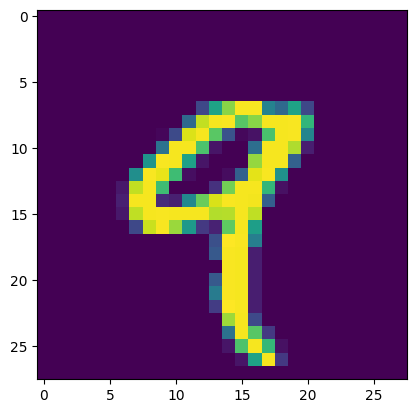

In [20]:
plt.imshow(X_train[4])

# Standarization

In [22]:
X_train=X_train/255
X_test=X_test/255
# Here we dont use standared scaler because pixel doesnot takes the negative values

# Model

In [24]:
model=Sequential()
model.add(Flatten(input_shape=(28,28))) # convert 28*28 data to 1D array
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [28]:
mew=model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5521 - loss: 1.7525 - val_accuracy: 0.8501 - val_loss: 0.6598
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8522 - loss: 0.6047 - val_accuracy: 0.8887 - val_loss: 0.4287
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8877 - loss: 0.4292 - val_accuracy: 0.9029 - val_loss: 0.3577
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8991 - loss: 0.3698 - val_accuracy: 0.9086 - val_loss: 0.3236
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9034 - loss: 0.3403 - val_accuracy: 0.9133 - val_loss: 0.3037
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9088 - loss: 0.3188 - val_accuracy: 0.9177 - val_loss: 0.2931
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9124 - loss: 0.3059 - val_accuracy: 0.9198 - val_loss: 0.2802
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9151 - loss: 0.29

In [29]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9427

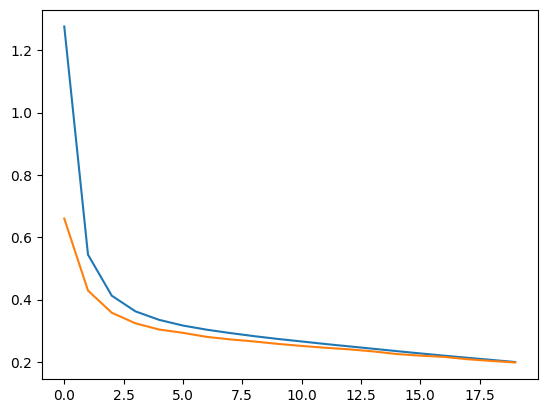

In [31]:
plt.plot(mew.history['loss'])
plt.plot(mew.history['val_loss'])

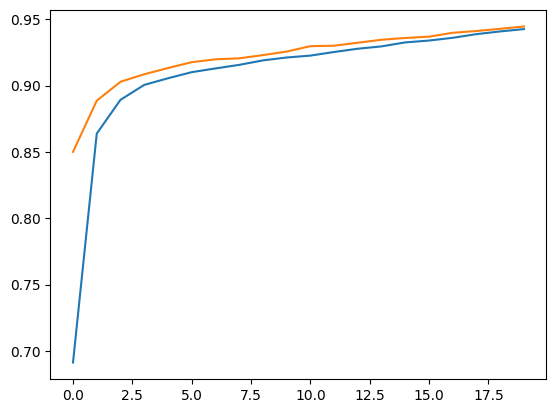

In [32]:
plt.plot(mew.history['accuracy'])
plt.plot(mew.history['val_accuracy'])

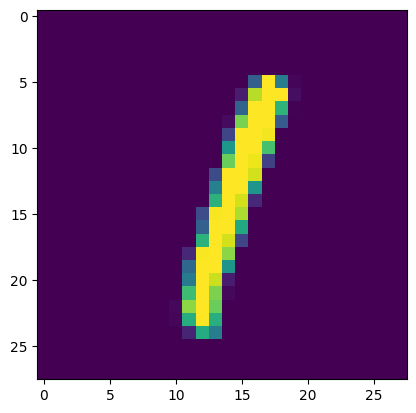

In [35]:
plt.imshow(X_test[5])

In [34]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([1])